<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/Project_AI_3_VietNamese_Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

In [ ]:
folder = '/content/gdrive/MyDrive/money'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('5000 '):
    output= 1.0
  if file.startswith('10000 '):
    output= 2.0
  if file.startswith('20.000 '):
    output= 3.0
  if file.startswith('50.000 '):
    output= 4.0
  if file.startswith('100.000 '):
    output= 5.0
  if file.startswith('200.000 '):
    output= 6.0
  if file.startswith('500.000 '):
    output= 7.0

  photo = load_img(folder + '/' + file, target_size= (150,150))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/gdrive/MyDrive/Data_digital_3/money_photos.npy', photos)
save('/content/gdrive/MyDrive/Data_digital_3/money_labels.npy', labels)

(141, 150, 150, 3) (141,)


In [ ]:
# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/gdrive/MyDrive/Data_digital_3/money_photos.npy')
labels = np.load('/content/gdrive/MyDrive/Data_digital_3/money_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:15], labels[:15]
train_x, train_y = photos[15:], labels[15:]

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

In [ ]:
# Tạo ra mô hình mạng CNN để train

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=85), epochs=100, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/100
2/2 [==============================] - 3s 311ms/step - loss: 5.3364 - accuracy: 0.4524 - val_loss: 3.3644 - val_accuracy: 0.5333
Epoch 2/100
2/2 [==============================] - 1s 478ms/step - loss: 3.9570 - accuracy: 0.4683 - val_loss: 3.8422 - val_accuracy: 0.4000
Epoch 3/100
2/2 [==============================] - 1s 208ms/step - loss: 2.2189 - accuracy: 0.5000 - val_loss: 1.6462 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 1s 466ms/step - loss: 1.1430 - accuracy: 0.5952 - val_loss: 1.8862 - val_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 1s 462ms/step - loss: 1.2361 - accuracy: 0.5476 - val_loss: 2.0081 - val_accuracy: 0.4667
Epoch 6/100
2/2 [==============================] - 1s 467ms/step - loss: 1.2620 - accuracy: 0.5000 - val_loss: 1.6014 - val_accuracy: 0.4667
Epoch 7/100
2/2 [==============================] - 1s 342ms/step - loss: 1.0094 - accuracy: 0.5714 - val_loss: 1.2348 - val_accuracy: 0.8667
Epoch 8/100
2

Test loss: 3.1295852661132812
Test accunacy 0.800000011920929


Text(0.5, 1.0, 'Training & Testing Accuracy')

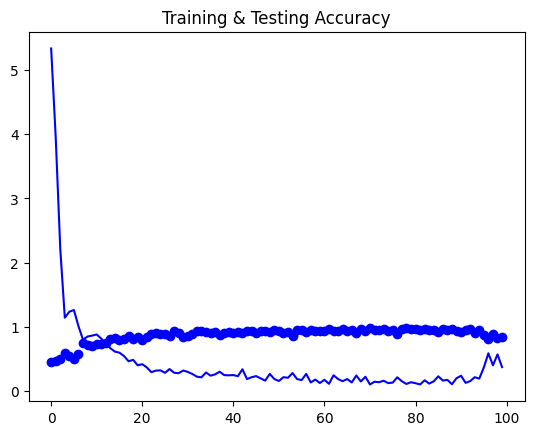

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [ ]:
model.save('/content/gdrive/MyDrive/Result_3/Money.h5')

1/1 [==============================] - 0s 18ms/step
200000 DONG


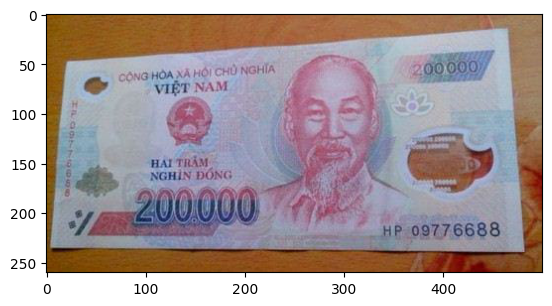

1/1 [==============================] - 0s 18ms/step
5000 DONG


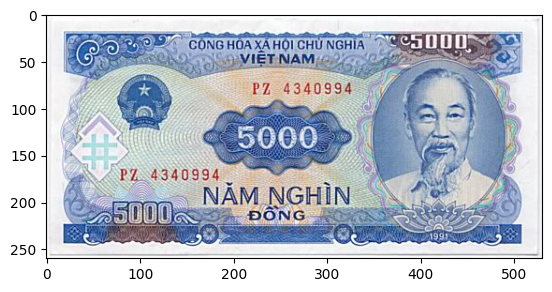

1/1 [==============================] - 0s 19ms/step
500000 DONG


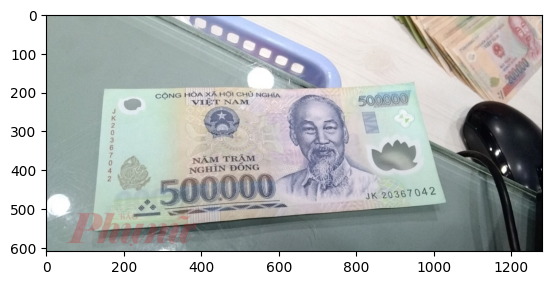

1/1 [==============================] - 0s 18ms/step
50000 DONG


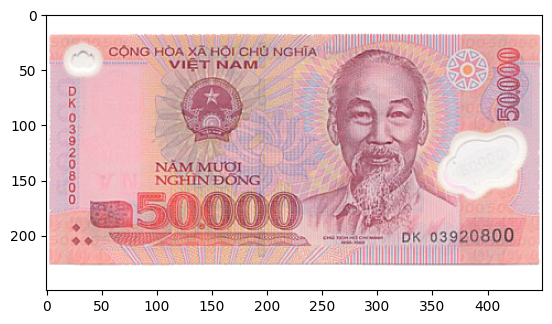

In [ ]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/gdrive/MyDrive/Data_test'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (150, 150))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ','5000 DONG','10000 DONG','20000 DONG', '50000 DONG', '100000 DONG','200000 DONG','500000 DONG']
  print(class_name[result])
  plt.show()